In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist, cdist, squareform
from sklearn.linear_model import Ridge
from scipy.spatial import ConvexHull
from scipy.stats import gaussian_kde
from matplotlib import colormaps
import umap

# Loading data

In [2]:
path = r"C:\Users\matta\Desktop\Documents\Python\Geolocation\climate_data\working_data\labeled_climate_data.pkl"
df = pd.read_pickle(path)
df.shape

(481631, 122)

In [3]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace = True)
df.shape

(475432, 122)

In [4]:
df.Level_1.value_counts()

Level_1
8  EASTERN TEMPERATE FORESTS          147881
9  GREAT PLAINS                       138042
10  NORTH AMERICAN DESERTS             84970
6  NORTHWESTERN FORESTED MOUNTAINS     53015
5  NORTHERN FORESTS                    24590
11  MEDITERRANEAN CALIFORNIA            9600
13  TEMPERATE SIERRAS                   6136
7  MARINE WEST COAST FOREST             5707
12  SOUTHERN SEMIARID HIGHLANDS         2435
0  WATER                                1885
15  TROPICAL WET FORESTS                1171
Name: count, dtype: int64

In [5]:
df = df[df.Level_1 != '0  WATER'].reset_index(drop=True)
df.shape

(473547, 122)

In [6]:
df.Level_1.unique()

array(['5  NORTHERN FORESTS', '7  MARINE WEST COAST FOREST',
       '6  NORTHWESTERN FORESTED MOUNTAINS', '10  NORTH AMERICAN DESERTS',
       '9  GREAT PLAINS', '8  EASTERN TEMPERATE FORESTS',
       '11  MEDITERRANEAN CALIFORNIA', '13  TEMPERATE SIERRAS',
       '12  SOUTHERN SEMIARID HIGHLANDS', '15  TROPICAL WET FORESTS'],
      dtype=object)

In [7]:
df.Level_1.nunique()

10

In [8]:
features = list(set(list(df.columns)) - set(['longitude', 'latitude', 'Level_1', 'Level_2', 'Level_3']))

In [9]:
feature_df = df[features]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(feature_df)

In [10]:
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = features
scaled_df[['longitude', 'latitude', 'Level_1', 'Level_2', 'Level_3']] = df[['longitude', 'latitude', 'Level_1', 'Level_2', 'Level_3']]
scaled_df.shape

(473547, 122)

# Data exploration

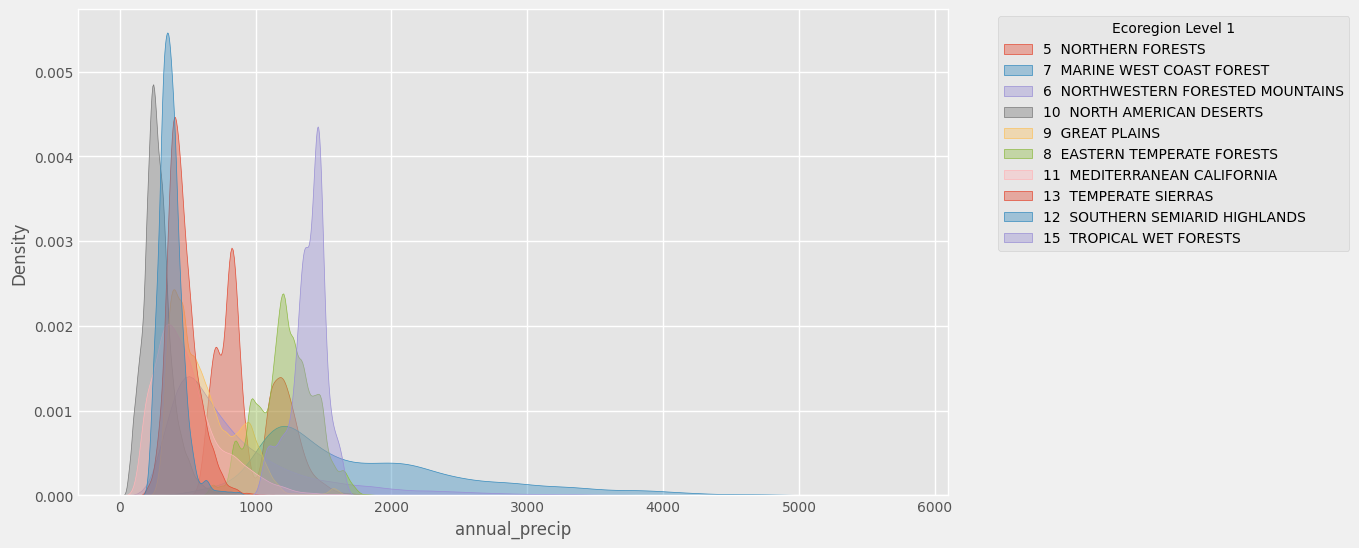

In [14]:
plt.figure(figsize=(10,6))
plt.style.use("ggplot")
for cat in df["Level_1"].unique():
    subset = df[df["Level_1"] == cat]
    sns.kdeplot(
        subset["annual_precip"],
        label=cat, 
        fill=True,
        alpha=0.4
    )

plt.legend(title="Ecoregion Level 1", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

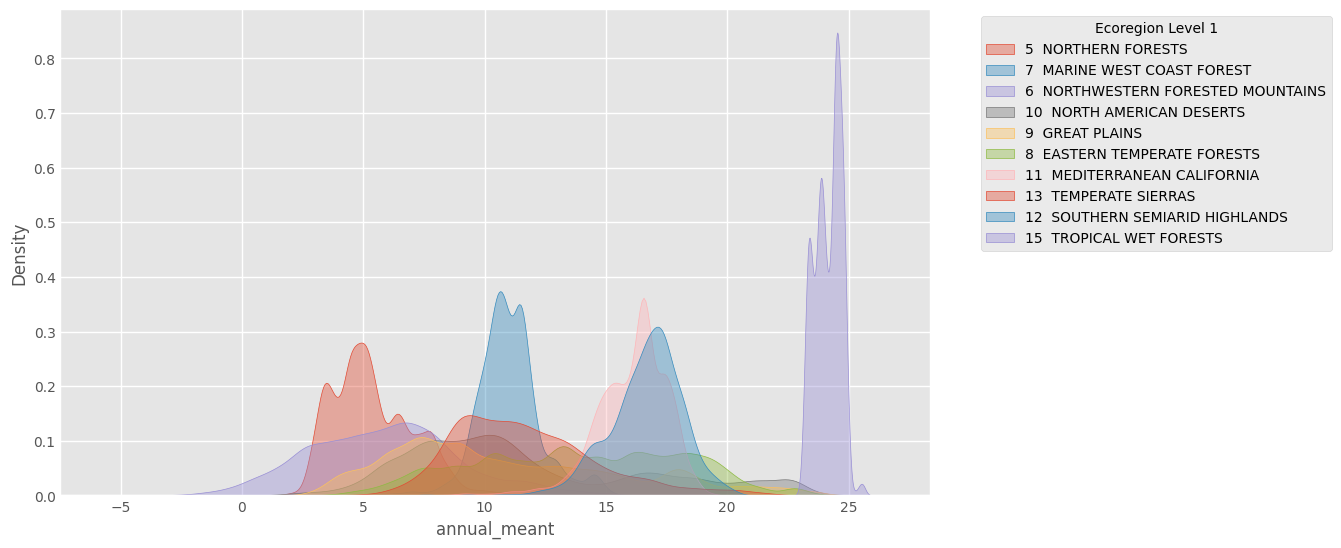

In [15]:
plt.figure(figsize=(10,6))
plt.style.use("ggplot")
for cat in df["Level_1"].unique():
    subset = df[df["Level_1"] == cat]
    sns.kdeplot(
        subset["annual_meant"],
        label=cat, 
        fill=True,
        alpha=0.4
    )

plt.legend(title="Ecoregion Level 1", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

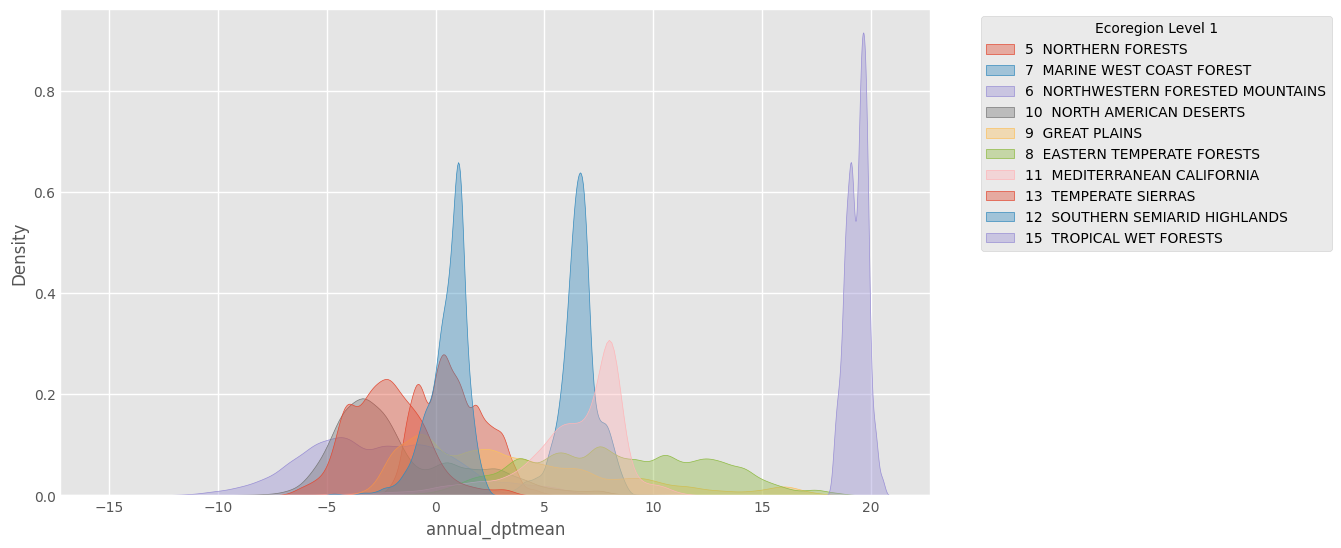

In [16]:
plt.figure(figsize=(10,6))
plt.style.use("ggplot")
for cat in df["Level_1"].unique():
    subset = df[df["Level_1"] == cat]
    sns.kdeplot(
        subset["annual_dptmean"],
        label=cat, 
        fill=True,
        alpha=0.4
    )

plt.legend(title="Ecoregion Level 1", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

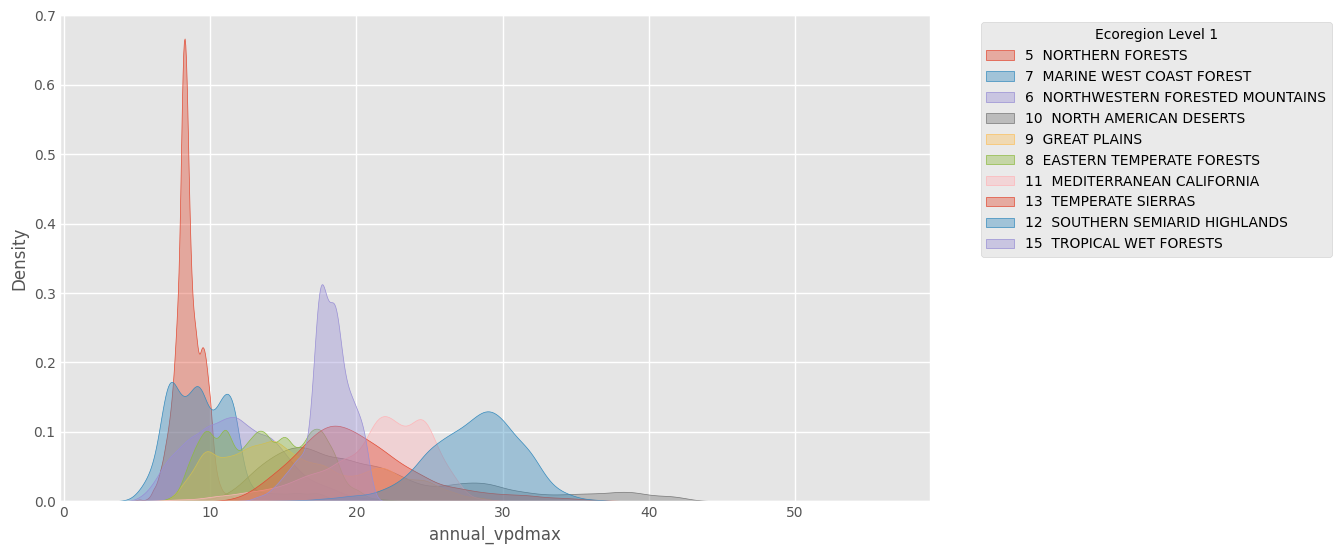

In [17]:
plt.figure(figsize=(10,6))
plt.style.use("ggplot")
for cat in df["Level_1"].unique():
    subset = df[df["Level_1"] == cat]
    sns.kdeplot(
        subset["annual_vpdmax"],
        label=cat, 
        fill=True,
        alpha=0.4
    )

plt.legend(title="Ecoregion Level 1", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

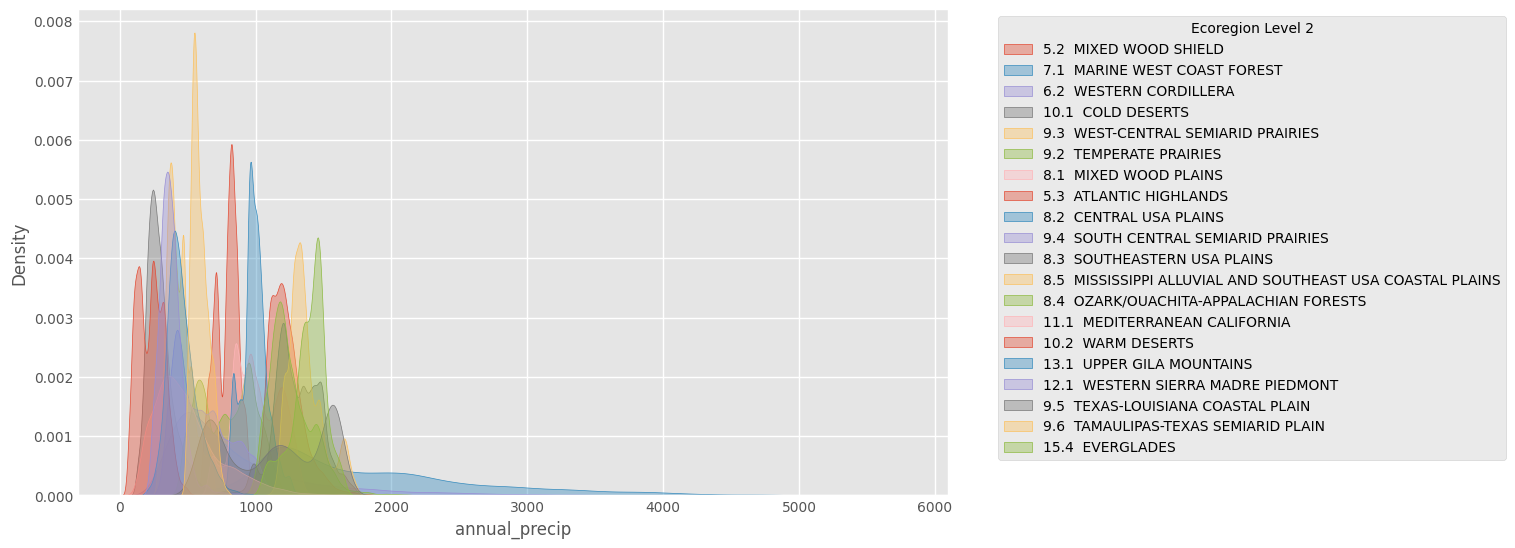

In [18]:
plt.figure(figsize=(10,6))
plt.style.use("ggplot")
for cat in df["Level_2"].unique():
    subset = df[df["Level_2"] == cat]
    sns.kdeplot(
        subset["annual_precip"],
        label=cat, 
        fill=True,
        alpha=0.4
    )

plt.legend(title="Ecoregion Level 2", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# PCA

In [19]:
pca = PCA(n_components=0.95)   
X_pca = pca.fit_transform(scaled_df[features])
pca_df = pd.DataFrame(X_pca)
print(pca_df.shape)
pca_df.head()

(473547, 6)


0         1         2         3         4         5
0 -12.797958 -0.617557 -3.950648  1.877080 -0.328263 -0.113230
1 -12.658391 -0.603536 -3.962532  1.849353 -0.284997 -0.083267
2 -12.766973 -0.595062 -3.958538  1.894539 -0.331888 -0.127260
3 -12.831694 -0.561866 -3.944222  1.958851 -0.348111 -0.176490
4 -12.824350 -0.519016 -3.933657  2.027063 -0.358669 -0.214243

In [20]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473547 entries, 0 to 473546
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       473547 non-null  float32
 1   1       473547 non-null  float32
 2   2       473547 non-null  float32
 3   3       473547 non-null  float32
 4   4       473547 non-null  float32
 5   5       473547 non-null  float32
dtypes: float32(6)
memory usage: 10.8 MB


In [21]:
pca_df['longitude'], pca_df['latitude'], pca_df['Level_1'], pca_df['Level_2'], pca_df['Level_3'] = df['longitude'], df['latitude'], df['Level_1'], df['Level_2'], df['Level_3']
pca_df.shape

(473547, 11)

In [22]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473547 entries, 0 to 473546
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   0          473547 non-null  float32
 1   1          473547 non-null  float32
 2   2          473547 non-null  float32
 3   3          473547 non-null  float32
 4   4          473547 non-null  float32
 5   5          473547 non-null  float32
 6   longitude  473547 non-null  float64
 7   latitude   473547 non-null  float64
 8   Level_1    473547 non-null  object 
 9   Level_2    473547 non-null  object 
 10  Level_3    473547 non-null  object 
dtypes: float32(6), float64(2), object(3)
memory usage: 28.9+ MB


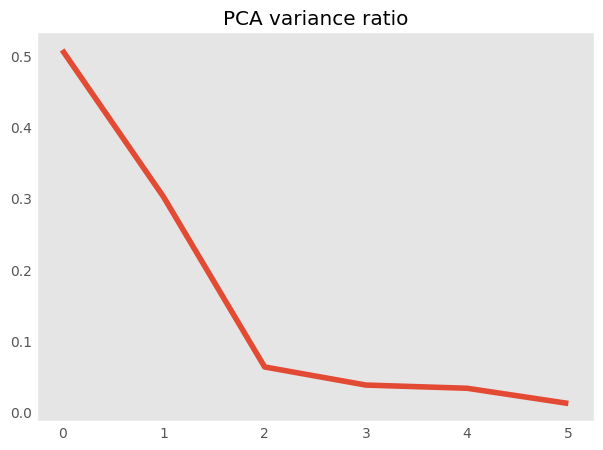

In [24]:
plt.style.use("ggplot")
plt.plot(pca.explained_variance_ratio_)
plt.title('PCA variance ratio')
plt.grid()
plt.show()

In [25]:
pca_df.head()

0         1         2         3         4         5  longitude  \
0 -12.797958 -0.617557 -3.950648  1.877080 -0.328263 -0.113230 -95.125000   
1 -12.658391 -0.603536 -3.962532  1.849353 -0.284997 -0.083267 -95.166667   
2 -12.766973 -0.595062 -3.958538  1.894539 -0.331888 -0.127260 -95.125000   
3 -12.831694 -0.561866 -3.944222  1.958851 -0.348111 -0.176490 -95.083333   
4 -12.824350 -0.519016 -3.933657  2.027063 -0.358669 -0.214243 -95.041667   

    latitude              Level_1                 Level_2  \
0  49.416667  5  NORTHERN FORESTS  5.2  MIXED WOOD SHIELD   
1  49.375000  5  NORTHERN FORESTS  5.2  MIXED WOOD SHIELD   
2  49.375000  5  NORTHERN FORESTS  5.2  MIXED WOOD SHIELD   
3  49.375000  5  NORTHERN FORESTS  5.2  MIXED WOOD SHIELD   
4  49.375000  5  NORTHERN FORESTS  5.2  MIXED WOOD SHIELD   

                              Level_3  
0  5.2.2  Northern Minnesota Wetlands  
1  5.2.2  Northern Minnesota Wetlands  
2  5.2.2  Northern Minnesota Wetlands  
3  5.2.2  Northern Minnesota Wetlands  
4  5.2.2  Northern Minnesota Wetlands

In [26]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473547 entries, 0 to 473546
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   0          473547 non-null  float32
 1   1          473547 non-null  float32
 2   2          473547 non-null  float32
 3   3          473547 non-null  float32
 4   4          473547 non-null  float32
 5   5          473547 non-null  float32
 6   longitude  473547 non-null  float64
 7   latitude   473547 non-null  float64
 8   Level_1    473547 non-null  object 
 9   Level_2    473547 non-null  object 
 10  Level_3    473547 non-null  object 
dtypes: float32(6), float64(2), object(3)
memory usage: 28.9+ MB


In [27]:
pca_df.columns

Index([0, 1, 2, 3, 4, 5, 'longitude', 'latitude', 'Level_1', 'Level_2',
       'Level_3'],
      dtype='object')

In [28]:
pairs = list(itertools.combinations([0,1,2], 2))
print(pairs)

[(0, 1), (0, 2), (1, 2)]


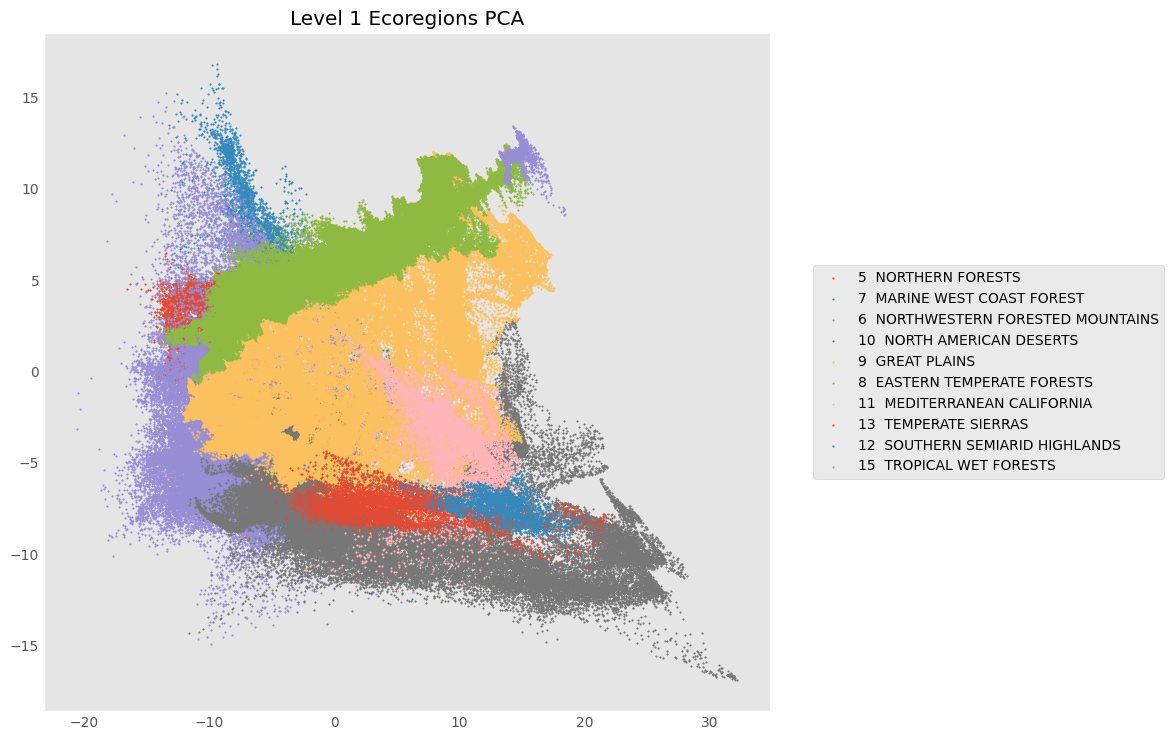

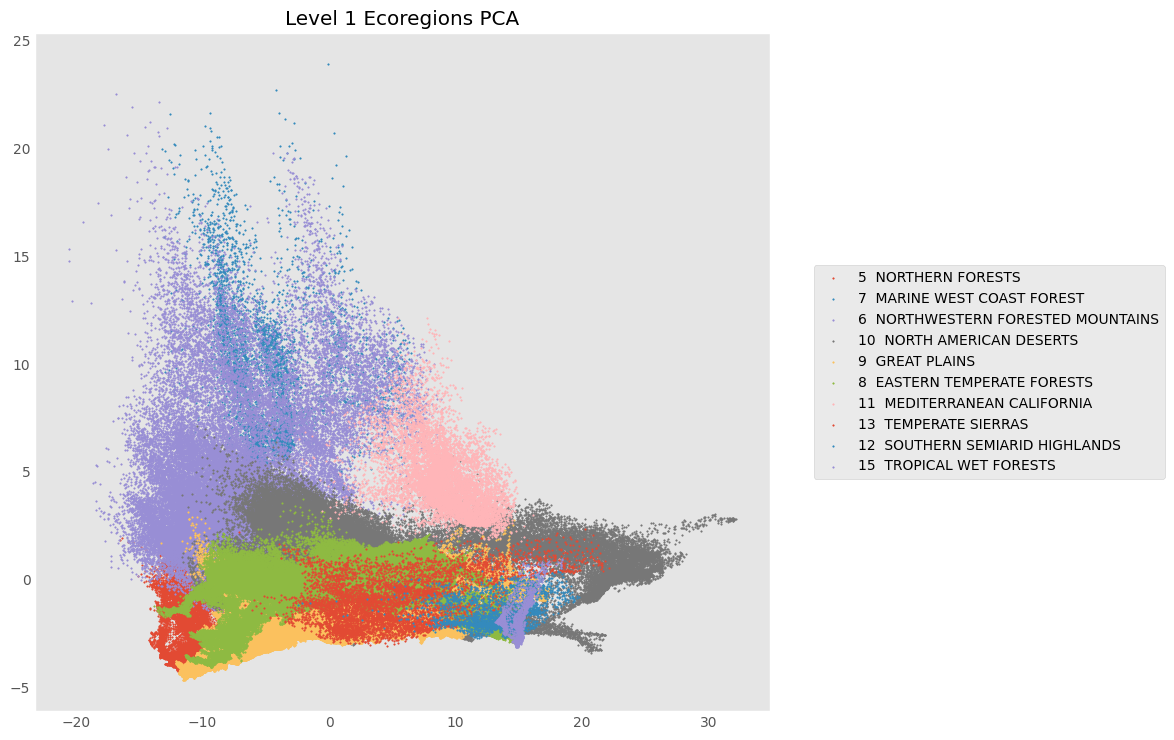

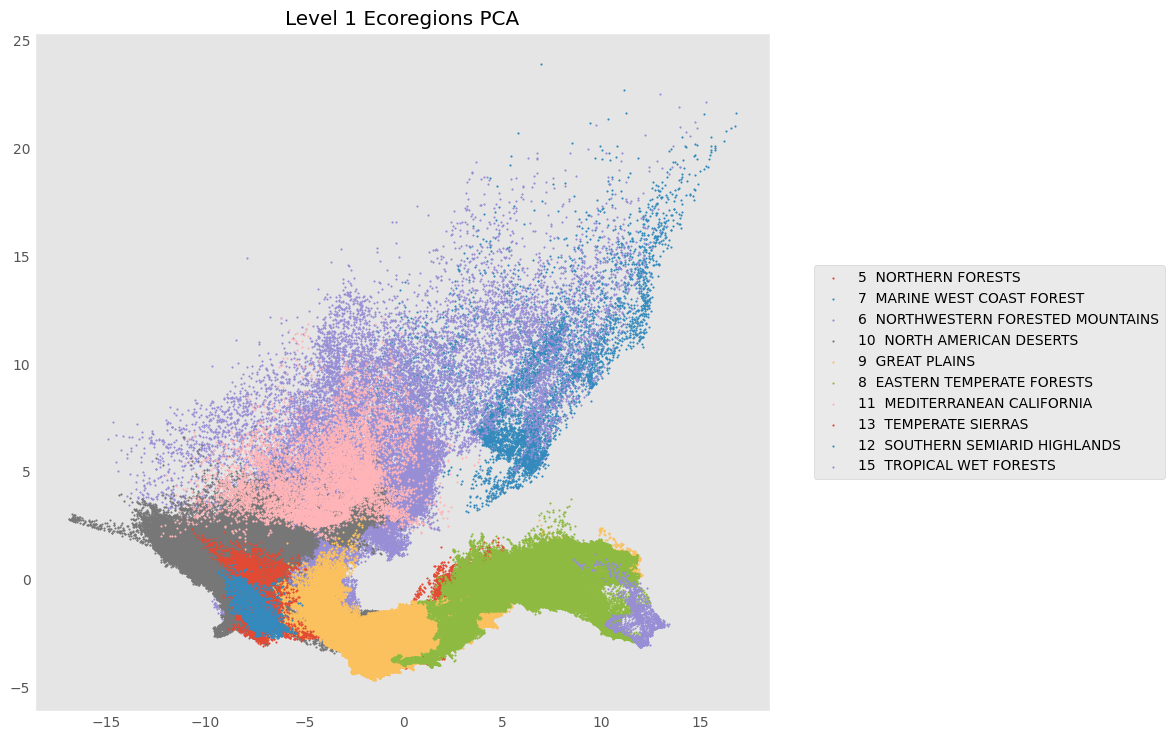

In [29]:
for i, j in pairs:
    plt.style.use("ggplot")
    plt.figure(figsize=(12,7.5))
    for k in pca_df.Level_1.unique():
        plt.scatter(pca_df[pca_df.Level_1 == k][i], pca_df[pca_df.Level_1 == k][j], s=1, label = k)
    plt.legend(
        bbox_to_anchor=(1.05, 0.5), 
        loc='center left')
    plt.grid()
    plt.title('Level 1 Ecoregions PCA')
    plt.tight_layout()
    plt.show()

# KMeans

## Scaled data

In [30]:
df_labels = pd.DataFrame(scaled_df[['latitude', 'longitude', 'Level_1', 'Level_2', 'Level_3']])
X_scaled = pd.DataFrame(scaled_df.drop(columns = ['latitude', 'longitude', 'Level_1', 'Level_2', 'Level_3']))

In [31]:
df_labels.Level_1.value_counts()

Level_1
8  EASTERN TEMPERATE FORESTS          147881
9  GREAT PLAINS                       138042
10  NORTH AMERICAN DESERTS             84970
6  NORTHWESTERN FORESTED MOUNTAINS     53015
5  NORTHERN FORESTS                    24590
11  MEDITERRANEAN CALIFORNIA            9600
13  TEMPERATE SIERRAS                   6136
7  MARINE WEST COAST FOREST             5707
12  SOUTHERN SEMIARID HIGHLANDS         2435
15  TROPICAL WET FORESTS                1171
Name: count, dtype: int64

In [32]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df_labels['scaled_kmeans_label'] = clusters
for i in df_labels.Level_1.unique(): 
    print(i)
    print(df_labels[df_labels.Level_1 == i].scaled_kmeans_label.value_counts(normalize=True))
    print()

5  NORTHERN FORESTS
scaled_kmeans_label
9    0.898292
3    0.101708
Name: proportion, dtype: float64

7  MARINE WEST COAST FOREST
scaled_kmeans_label
5    0.930436
3    0.026809
1    0.023830
8    0.018749
6    0.000175
Name: proportion, dtype: float64

6  NORTHWESTERN FORESTED MOUNTAINS
scaled_kmeans_label
7    0.435028
0    0.267679
5    0.141884
6    0.074017
9    0.069452
1    0.010563
8    0.000962
3    0.000377
4    0.000038
Name: proportion, dtype: float64

10  NORTH AMERICAN DESERTS
scaled_kmeans_label
6    0.374050
0    0.277604
4    0.159009
1    0.136789
7    0.051960
2    0.000494
9    0.000071
5    0.000024
Name: proportion, dtype: float64

9  GREAT PLAINS
scaled_kmeans_label
0    0.295258
9    0.151555
1    0.126208
3    0.117638
2    0.113082
8    0.102223
6    0.086872
7    0.007164
Name: proportion, dtype: float64

8  EASTERN TEMPERATE FORESTS
scaled_kmeans_label
8    0.351025
3    0.293101
2    0.257051
9    0.098823
Name: proportion, dtype: float64

11  MEDITERRANEAN

In [33]:
pca_df['scaled_kmeans_label'] = clusters

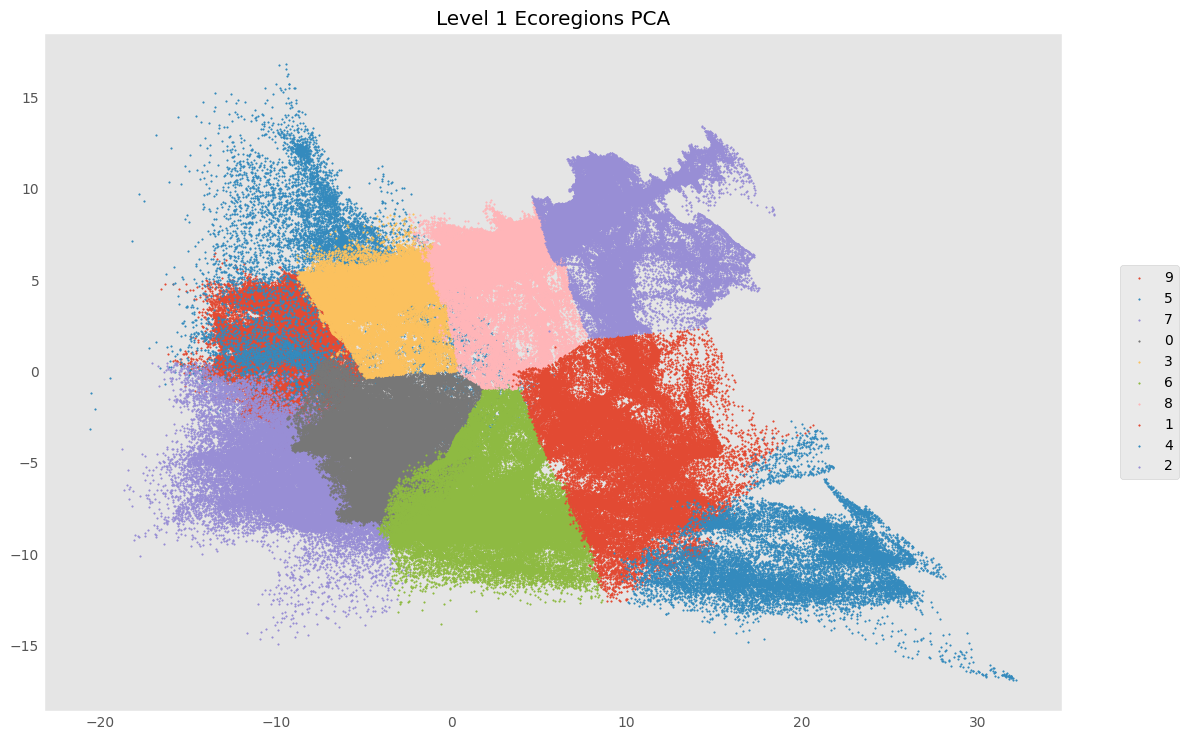

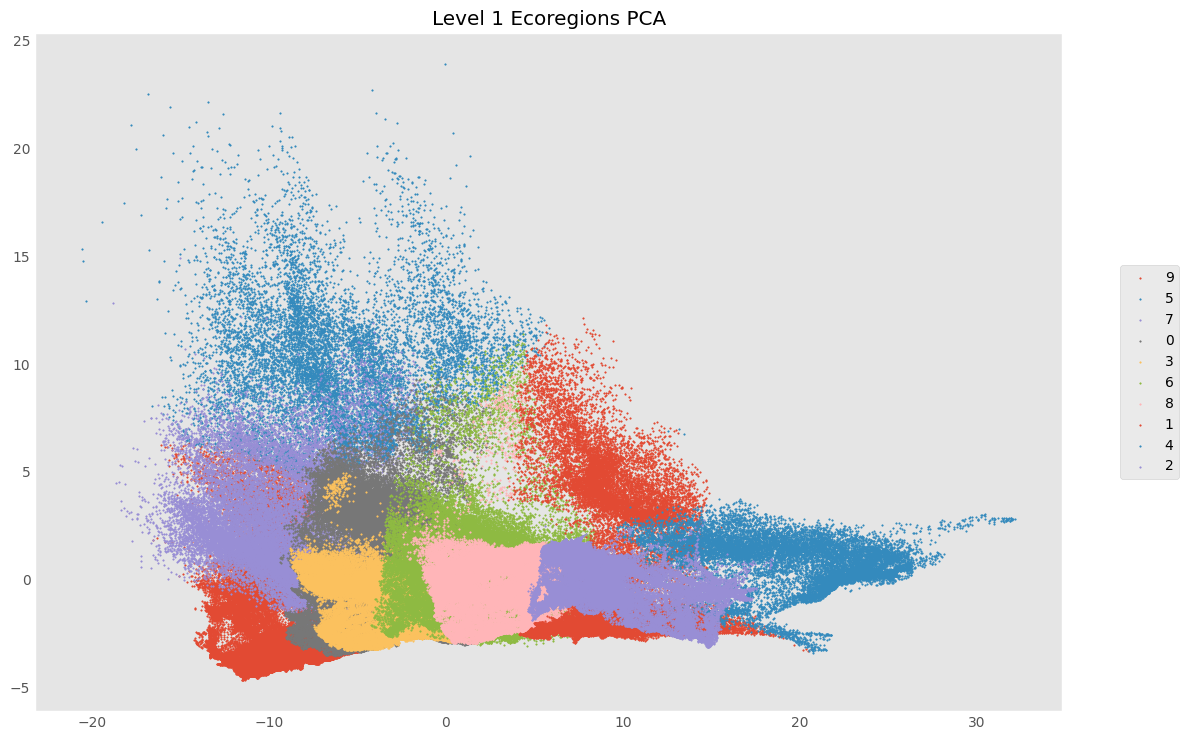

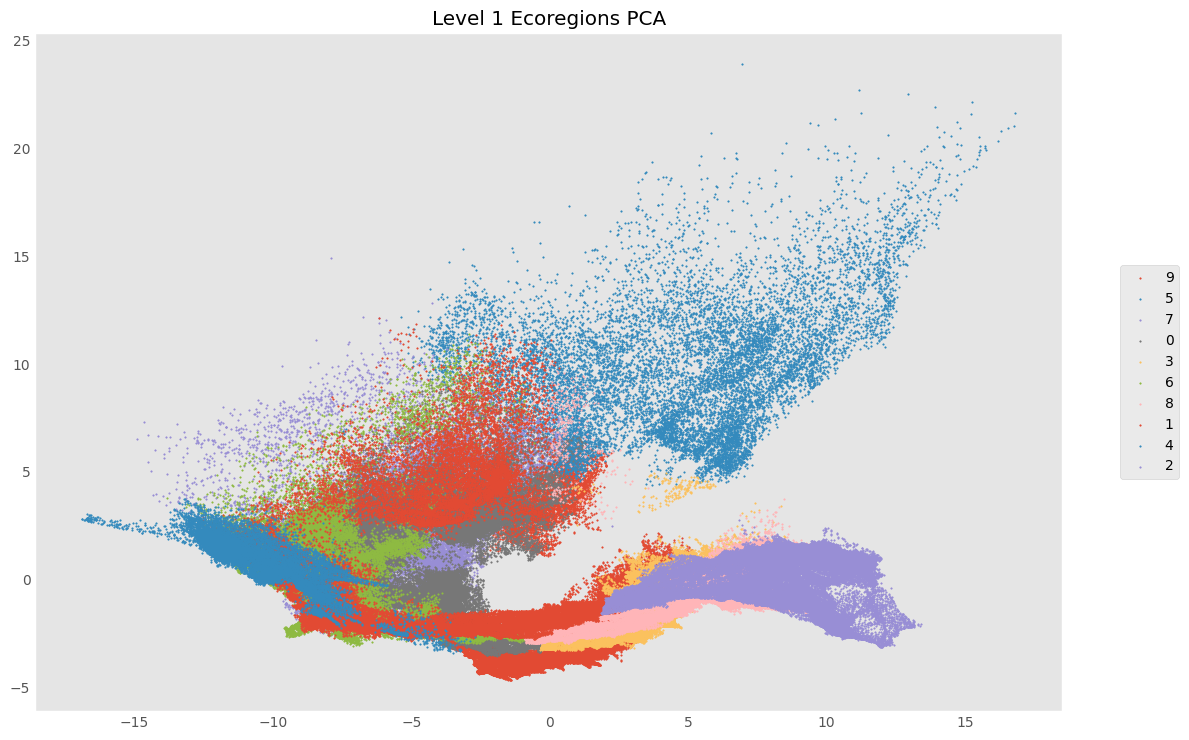

In [34]:
for i, j in pairs:
    plt.style.use("ggplot")
    plt.figure(figsize=(12,7.5))
    for k in pca_df.scaled_kmeans_label.unique():
        plt.scatter(pca_df[pca_df.scaled_kmeans_label == k][i], pca_df[pca_df.scaled_kmeans_label == k][j], s=1, label = k)
    plt.legend(
        bbox_to_anchor=(1.05, 0.5), 
        loc='center left')
    plt.grid()
    plt.title('Level 1 Ecoregions PCA')
    plt.tight_layout()
    plt.show()

## PCA data

In [35]:
X_pca = pd.DataFrame(pca_df[[0, 1, 2]])
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)
df_labels['pca_kmeans_label'] = clusters

In [36]:
pca_df['pca_kmeans_label'] = clusters

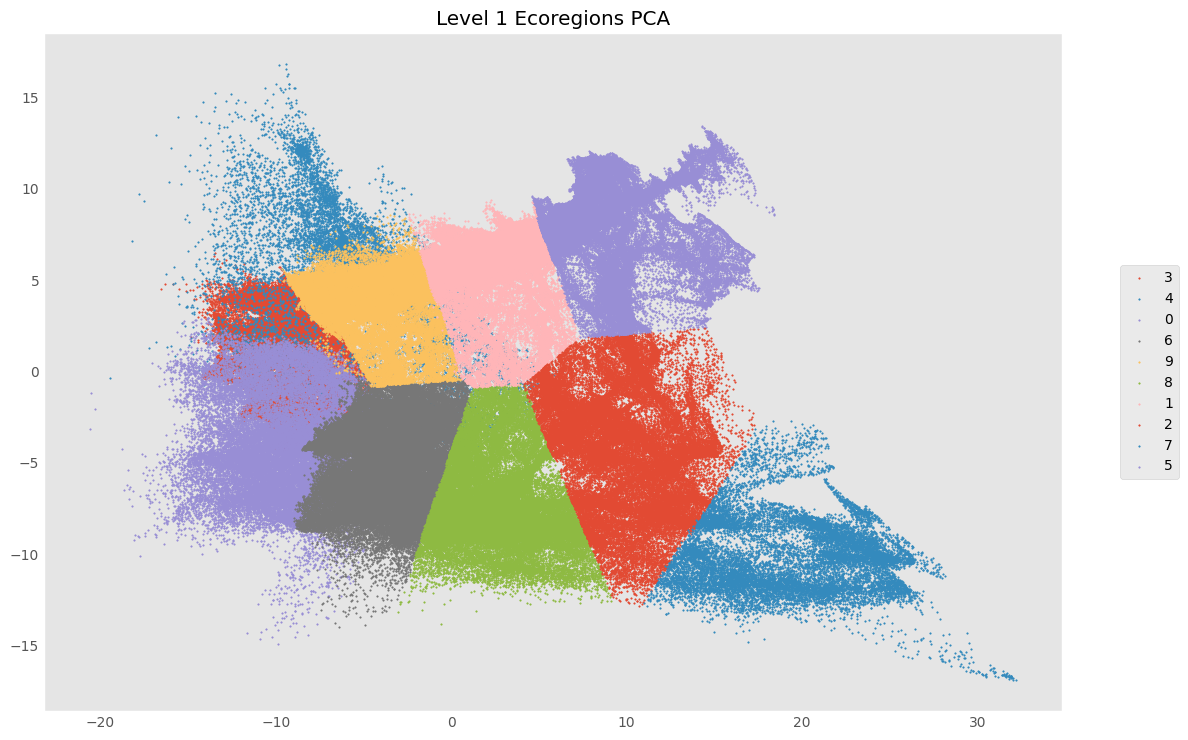

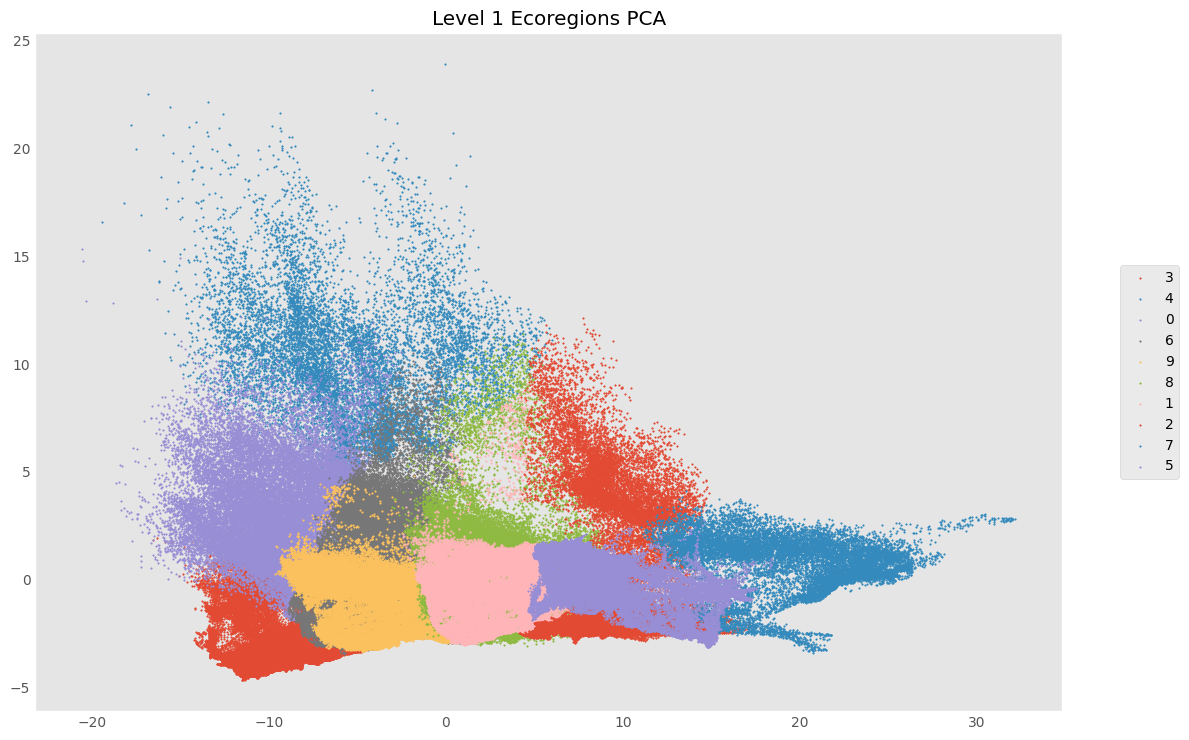

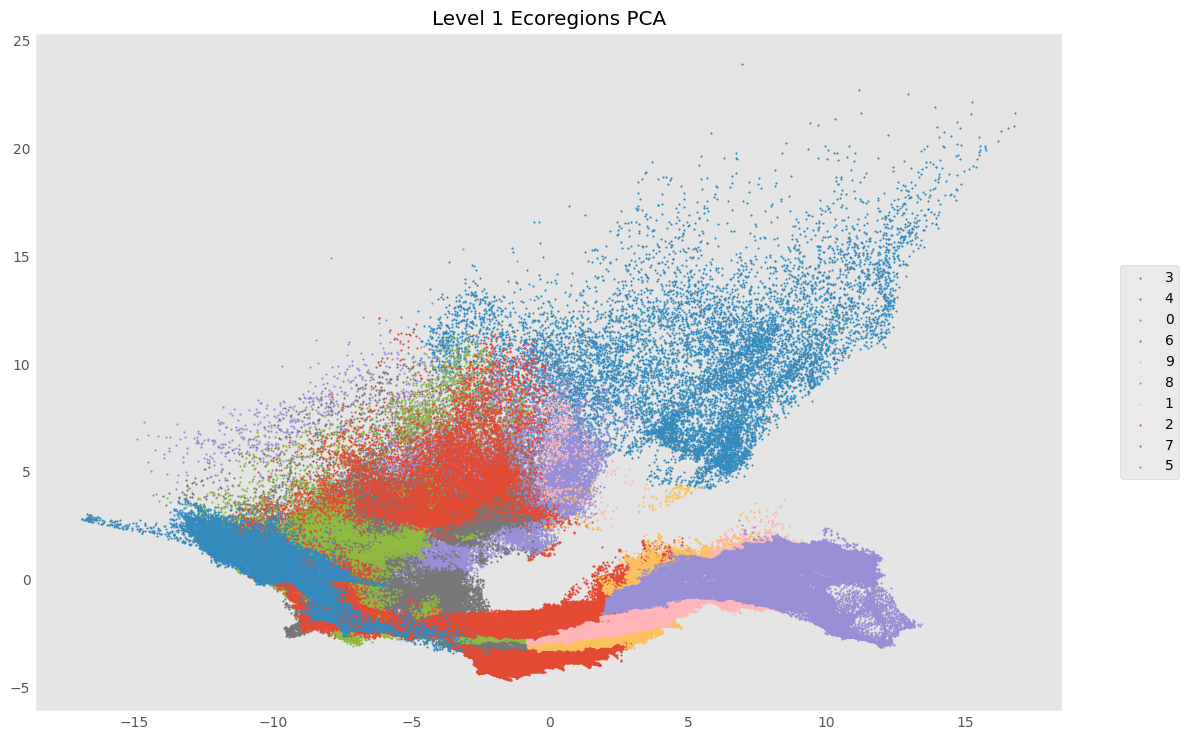

In [37]:
for i, j in pairs:
    plt.style.use("ggplot")
    plt.figure(figsize=(12,7.5))
    for k in pca_df.pca_kmeans_label.unique():
        plt.scatter(pca_df[pca_df.pca_kmeans_label == k][i], pca_df[pca_df.pca_kmeans_label == k][j], s=1, label = k)
    plt.legend(
        bbox_to_anchor=(1.05, 0.5), 
        loc='center left')
    plt.grid()
    plt.title('Level 1 Ecoregions PCA')
    plt.tight_layout()
    plt.show()

# MDS

In [38]:
mds_landmarks = pd.DataFrame()
for i in pca_df.Level_1.unique():
    sample_df = pca_df[pca_df.Level_1 == i].sample(120, random_state=42)
    mds_landmarks = pd.concat([mds_landmarks, sample_df])

In [39]:
X_landmarks = mds_landmarks[[0, 1, 2, 3, 4, 5]]
X_full = pca_df[[0, 1, 2, 3, 4, 5]]

D_landmarks = squareform(pdist(X_landmarks.values, metric='braycurtis'))

In [40]:
# MDS on landmarks
mds = MDS(n_components=2, dissimilarity="precomputed", metric=True, random_state=42, n_jobs=-1)
Y_landmarks = mds.fit_transform(D_landmarks)

# Compute dissimilarities between all points and landmarks
D_full_landmarks = cdist(X_full.values, X_landmarks.values, metric='braycurtis')

# Simple triangulation: approximate embedding by weighted average of nearest landmarks
nearest_idx = np.argmin(D_full_landmarks, axis=1)
Y_full = Y_landmarks[nearest_idx]

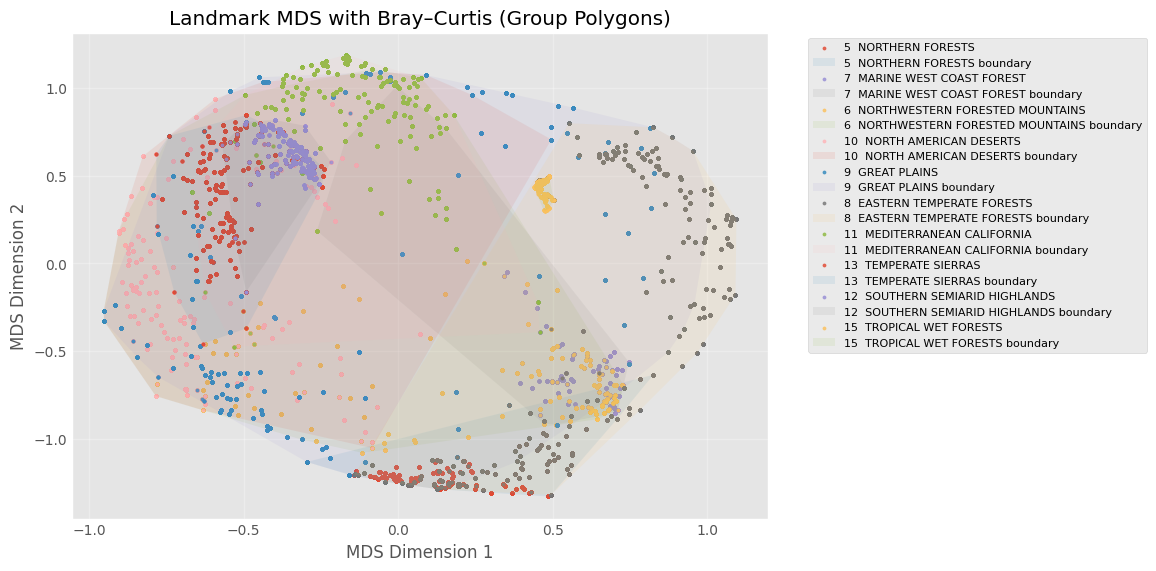

In [41]:
plt.style.use("ggplot")
plt.figure(figsize=(8,6))
for cat in pca_df.Level_1.unique():
    mask = pca_df.Level_1 == cat
    points = Y_full[mask]
    plt.scatter(points[:, 0], points[:, 1], s=5, alpha=0.8, label=cat)

    # Convex hull polygon
    if len(points) >= 3:  # need at least 3 points
        hull = ConvexHull(points)
        hull_points = points[hull.vertices]

        plt.fill(
            hull_points[:, 0],
            hull_points[:, 1],
            alpha=0.1, 
            label=f"{cat} boundary"
        )

plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.title("Landmark MDS with Bray–Curtis (Group Polygons)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.grid(True, alpha=0.3)
plt.show()

In [42]:
# Train regression models to predict MDS coords from dissimilarities
reg_x = Ridge(alpha=1.0)
reg_y = Ridge(alpha=1.0)

# Fit only on landmarks themselves
reg_x.fit(D_landmarks, Y_landmarks[:, 0])
reg_y.fit(D_landmarks, Y_landmarks[:, 1])

# Predict full dataset embedding
Y_full = np.vstack([
    reg_x.predict(D_full_landmarks),
    reg_y.predict(D_full_landmarks)
]).T

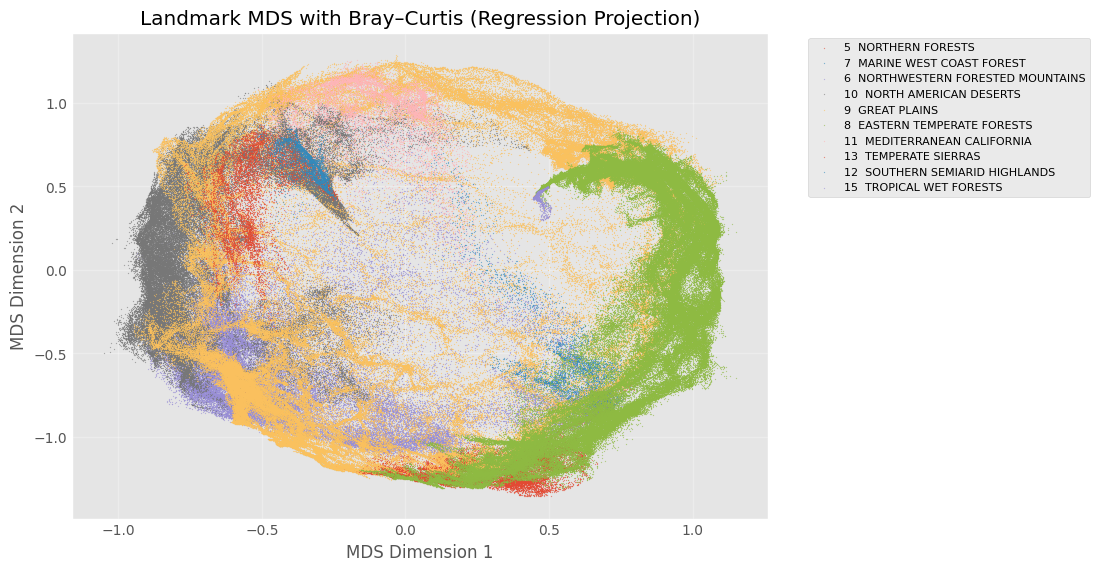

In [43]:
plt.figure(figsize=(8,6))
for cat in pca_df.Level_1.unique():
    mask = pca_df.Level_1 == cat
    plt.scatter(Y_full[mask, 0], Y_full[mask, 1], s=0.2, label=cat, alpha=0.5)

plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.title("Landmark MDS with Bray–Curtis (Regression Projection)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.grid(True, alpha=0.3)
plt.show()

# UMAP

In [44]:
umap_landmarks = pd.DataFrame()
for i in pca_df.Level_1.unique():
    sample_df = pca_df[pca_df.Level_1 == i].sample(250, random_state=42)
    umap_landmarks = pd.concat([umap_landmarks, sample_df])

y = umap_landmarks.Level_1
X_landmarks = umap_landmarks[[0, 1, 2, 3, 4, 5]]

In [45]:
umap_model = umap.UMAP(
    n_neighbors=30,      
    min_dist=0.1,        
    n_components=2,      
    metric='euclidean')  # or 'manhattan' / 'cosine' / 'braycurtis'

embedding = umap_model.fit_transform(X_landmarks)

In [48]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

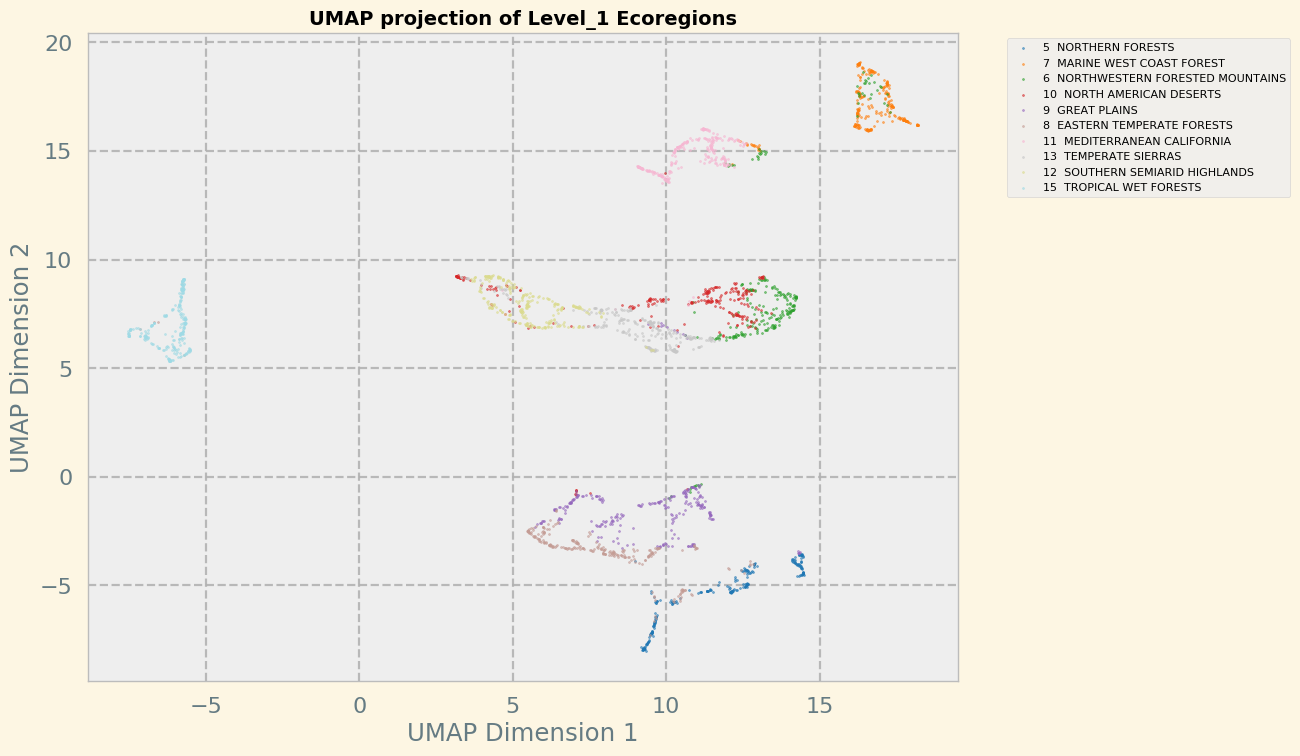

In [56]:
plt.style.use("seaborn-v0_8-poster")
plt.figure(figsize=(10,8))

categories = y.unique()
colors = plt.cm.tab20(np.linspace(0,1,len(categories)))

for cat, color in zip(categories, colors):
    mask = y == cat
    plt.scatter(embedding[mask,0], embedding[mask,1], s=2, label=cat, alpha=0.6, color=color)

plt.title("UMAP projection of Level_1 Ecoregions", fontsize=14, weight='bold')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(alpha=0.9)
plt.show()

TypeError: ColormapRegistry.get_cmap() takes 2 positional arguments but 3 were given

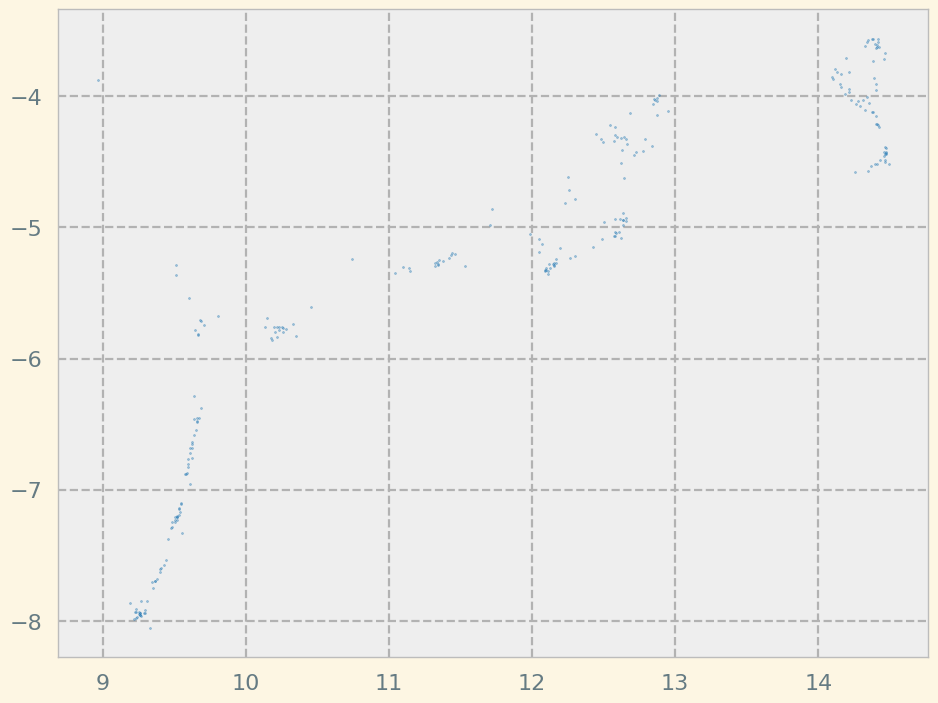

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib import colormaps  # ✅ new import for cmap handling

plt.figure(figsize=(10,8))
categories = y.unique()
colors = plt.cm.tab20(np.linspace(0,1,len(categories)))

for cat, color in zip(categories, colors):
    mask = y == cat
    points = embedding[mask].T  # transpose for KDE input

    # Scatter points
    plt.scatter(points[0], points[1], s=2, color=color, alpha=0.4, label=cat)

    # KDE contour
    if points.shape[1] > 20:
        kde = gaussian_kde(points)
        x_min, x_max = points[0].min(), points[0].max()
        y_min, y_max = points[1].min(), points[1].max()
        xx, yy = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
        zz = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)

        # ✅ Use modern colormap API
        cmap = colormaps.get_cmap("Greens", 5)

        plt.contourf(xx, yy, zz, levels=5, cmap=cmap, alpha=0.15)
        plt.contour(xx, yy, zz, levels=3, colors=[color], linewidths=1, alpha=0.6)

plt.title("UMAP Projection with KDE Group Contours", fontsize=14, weight='bold')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(alpha=0.3)
plt.show()
